## Imports

In [1]:
import time
import subprocess
import numpy as np
import matplotlib.pyplot as plt

## Function for measuring mean time and standard deviation of error

In [2]:
def run_experiment(script, N, extra_args=[], n_runs=5):
    times = []
    for _ in range(n_runs):
        start = time.time()
        cmd = ["python", script, str(N)] + [str(arg) for arg in extra_args]
        subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        times.append(time.time() - start)
    return np.mean(times), np.std(times, ddof=1) / np.sqrt(n_runs)

## Variables

In [3]:
Ns = [100, 400, 600, 1000]
n_runs = 5
results = {}

## Check for errors in Scripts

In [4]:
import subprocess

scripts = [
    (["python", "sph.py", "100"], "sph.py"),
    (["python", "sph_parallel.py", "100"], "sph_parallel.py"),
    (["python", "sph_parallel_shared_memory.py", "100"], "sph_parallel_shared_memory.py"),
    (["python", "sph_parallel_shared_memory_batched.py", "100", "100"], "sph_parallel_shared_memory_batched.py")
]

for cmd, name in scripts:
    try:
        result = subprocess.run(cmd, check=True, capture_output=True, text=True)
        print(f"{name} OK:\n{result.stdout}")
    except subprocess.CalledProcessError as e:
        print(f"{name} ERROR:\n{e.stderr}")

sph.py OK:

sph_parallel.py OK:
<multiprocessing.pool.Pool state=RUN pool_size=12>

sph_parallel_shared_memory.py OK:
<multiprocessing.pool.Pool state=RUN pool_size=12>

sph_parallel_shared_memory_batched.py OK:
Running simulation with batch size: 100



# Measure Time

## Original Code

In [5]:
sim = "sph"
results[sim] = {"Ns": [], "mean_times": [], "stderr": []}
for N in Ns:
    mean_time, stderr = run_experiment("sph.py", N, n_runs=n_runs)
    results[sim]["Ns"].append(N)
    results[sim]["mean_times"].append(mean_time)
    results[sim]["stderr"].append(stderr)
    print(f"{sim} with N={N}: {mean_time:.4f} ± {stderr:.4f}")

sph with N=100: 1.1401 ± 0.0218
sph with N=400: 6.0854 ± 0.0241
sph with N=600: 12.9136 ± 0.4638
sph with N=1000: 31.2747 ± 0.3615


## Code with Mutliprocessing

In [6]:
sim = "sph_parallel"
results[sim] = {"Ns": [], "mean_times": [], "stderr": []}
for N in Ns:
    mean_time, stderr = run_experiment("sph_parallel.py", N, n_runs=n_runs)
    results[sim]["Ns"].append(N)
    results[sim]["mean_times"].append(mean_time)
    results[sim]["stderr"].append(stderr)
    print(f"{sim} with N={N}: {mean_time:.4f} ± {stderr:.4f}")

sph_parallel with N=100: 4.4197 ± 0.0951
sph_parallel with N=400: 15.1334 ± 0.5333
sph_parallel with N=600: 24.4644 ± 1.1431
sph_parallel with N=1000: 44.0338 ± 0.6120


## Code with Multiprocessing and Shared Memory

In [7]:
sim = "sph_parallel_shared_memory"
results[sim] = {"Ns": [], "mean_times": [], "stderr": []}
for N in Ns:
    mean_time, stderr = run_experiment("sph_parallel_shared_memory.py", N, n_runs=n_runs)
    results[sim]["Ns"].append(N)
    results[sim]["mean_times"].append(mean_time)
    results[sim]["stderr"].append(stderr)
    print(f"{sim} with N={N}: {mean_time:.4f} ± {stderr:.4f}")

sph_parallel_shared_memory with N=100: 4.2275 ± 0.0242
sph_parallel_shared_memory with N=400: 14.9892 ± 0.2170
sph_parallel_shared_memory with N=600: 25.2633 ± 0.4362
sph_parallel_shared_memory with N=1000: 44.0948 ± 0.8078


## Code with Multiprocessing, Shared Memory and Batches

In [8]:
batch_sizes = [1, 10, 50, 100, 500, 600, 700, 800, 900, 1000]
for batch in batch_sizes:
    sim = f"sph_parallel_shared_memory_batched (batch={batch})"
    results[sim] = {"Ns": [], "mean_times": [], "stderr": []}
    for N in Ns:
        mean_time, stderr = run_experiment("sph_parallel_shared_memory_batched.py", N, extra_args=[batch], n_runs=n_runs)
        results[sim]["Ns"].append(N)
        results[sim]["mean_times"].append(mean_time)
        results[sim]["stderr"].append(stderr)
        print(f"{sim} with N={N}: {mean_time:.4f} ± {stderr:.4f}")

sph_parallel_shared_memory_batched (batch=1) with N=100: 7.2578 ± 0.1854
sph_parallel_shared_memory_batched (batch=1) with N=400: 33.7261 ± 0.8950
sph_parallel_shared_memory_batched (batch=1) with N=600: 55.6880 ± 0.1698
sph_parallel_shared_memory_batched (batch=1) with N=1000: 102.8549 ± 0.3744
sph_parallel_shared_memory_batched (batch=10) with N=100: 3.0881 ± 0.1096
sph_parallel_shared_memory_batched (batch=10) with N=400: 13.6302 ± 0.0534
sph_parallel_shared_memory_batched (batch=10) with N=600: 25.4168 ± 0.6956
sph_parallel_shared_memory_batched (batch=10) with N=1000: 51.4687 ± 1.1581
sph_parallel_shared_memory_batched (batch=50) with N=100: 3.3264 ± 0.2304
sph_parallel_shared_memory_batched (batch=50) with N=400: 11.1840 ± 0.0535
sph_parallel_shared_memory_batched (batch=50) with N=600: 20.9356 ± 0.7533
sph_parallel_shared_memory_batched (batch=50) with N=1000: 45.0701 ± 1.0006
sph_parallel_shared_memory_batched (batch=100) with N=100: 3.9609 ± 0.1569
sph_parallel_shared_memory_b

## Plot Comparison Figure

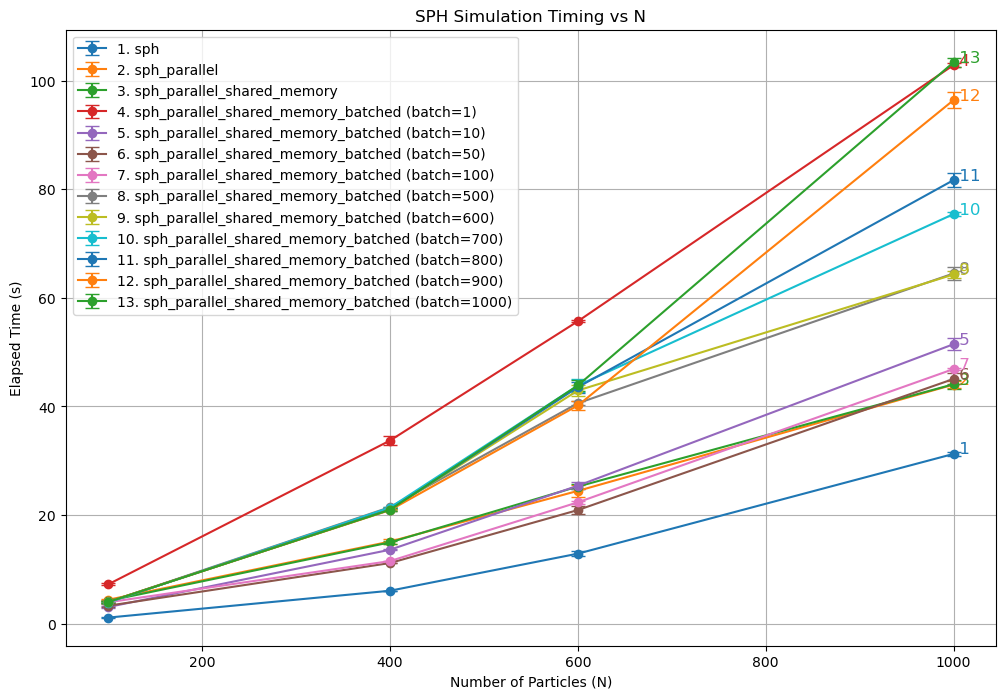

In [14]:
plt.figure(figsize=(12, 8))
for idx, (sim, data) in enumerate(results.items(), start=1):
    line, caps, bars = plt.errorbar(data["Ns"], data["mean_times"], yerr=data["stderr"],
                 marker='o', capsize=5, label=f"{idx}. {sim}")
    plt.text(data["Ns"][-1], data["mean_times"][-1], f" {idx}", fontsize=12, color=line.get_color())
plt.xlabel("Number of Particles (N)")
plt.ylabel("Elapsed Time (s)")
plt.title("SPH Simulation Timing vs N")
plt.legend()
plt.grid(True)
plt.savefig("sph_parallel_comparison.png")
plt.show()